# Taller #2 
Estudiante: Elias A Vergara 

### Indicaciones

En esta asignación utilizarás sklearn para entrenar y evaluar modelos de regresión Lasso en los datos que descargaste. 
Recuerda que la regresión Lasso utiliza un modelo lineal y una función de costo de mínimos cuadrados con una penalización L1, y que la penalización L1 tiene un parámetro de peso C en las notas de la clase (el parámetro de peso  = 1/(2C) en sklearn).

    # Iterar sobre los valores de C
    for C in C_range:
    temp = []
    lasso = Lasso(alpha=1/(2*C), max_iter=10000)

- (a) Grafica los datos que descargaste como un gráfico de dispersión 3D, es decir, con la primera característica en el eje x. La  segunda característica en el eje y y el objetivo en el eje z. Puedes usar la función scatter de matplotlib para esto. Por ejemplo, para datos de entrenamiento con dos características X y objetivo y:

        pythonCopy codeimport matplotlib.pyplot as pltfrom mpl_toolkits.mplot3d import Axes3D.
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], y)


¿Parece que los datos de entrenamiento se encuentran en un plano o en una curva?

- (b) Además de las dos características en el archivo de datos, añade características polinómicas adicionales equivalentes a todas las combinaciones de potencias de las dos características hasta la potencia 5 (puedes usar la función PolynomialFeatures de sklearn para hacer esto).

- Ahora entrena modelos de regresión Lasso con estas características polinómicas para un amplio rango de valores de C, por ejemplo, 1, 10, 1000 (puede que necesites ajustar estos valores para tus datos; empieza haciendo que C sea lo suficientemente pequeño como para que el modelo entrenado tenga todos los parámetros en cero y luego aumenta desde ahí). 

- Reporta los parámetros de los modelos entrenados (no des solo una lista de números, indica a qué característica corresponde cada valor de parámetro) y discute cómo cambian a medida que se varía C.

- (c) Para cada uno de los modelos del apartado (b), genera predicciones para la variable objetivo. Genera estas predicciones en una cuadrícula de valores de características. Puedes usar un par de bucles anidados para esto, por ejemplo:

        pythonCopy codeimport numpy as np
        Xtest = []
        grid = np.linspace(-5, 5)for i in grid:
        for j in grid:
        Xtest.append([i, j])
        Xtest = np.array(Xtest)
    
 
 - Esta cuadrícula debe extenderse más allá del rango de valores en el conjunto de datos. Por ejemplo, si la primera característica en el conjunto de datos tiene valores de 0 a 2, genera predicciones para valores de -5 a 5 o algo similar.
 
- Grafica estas predicciones en un gráfico de datos 3D y también muestra los datos de entrenamiento. Ajusta el rango de la cuadrícula utilizada para las predicciones de modo que los datos de entrenamiento aún puedan verse claramente en el gráfico. Depende de ti decidir cómo representar mejor estos datos, pero intenta que tu gráfico sea fácil de leer (sugerencia: puede ser útil graficar las predicciones como una superficie usando el comando plot_surface de matplotlib y los datos de entrenamiento como puntos utilizando el comando scatter de matplotlib; asegúrate de agregar una leyenda para identificar las diferentes curvas). Con referencia a este gráfico, discute cómo cambian las predicciones a medida que se varía C.


- (d) Usando los datos de parámetros del apartado (b) y la visualización del apartado (c), explica cómo se puede usar el parámetro de penalización C para gestionar el equilibrio entre el subajuste y el sobreajuste de los datos.

- (e) Repite los apartados (b) y (c) para un modelo de regresión Ridge. Este usa una penalización L2 en lugar de una penalización L1 en la función de costo. Compara el impacto en los parámetros del modelo al cambiar C en la regresión Lasso y en la regresión Ridge.
- 
        for C in C_range:
            ridge = Ridge(alpha=1/(2*C))

    - (i) Usando el modelo Lasso con características polinómicas del apartado (i), ahora utilizarás validación cruzada para seleccionar C la validacion cruzada usar el metodo (K Fold Cross Validation).

    - (ii) Usa validación cruzada (K Fold Cross Validation) de K= 5 particiones para graficar el promedio y la desviación estándar del error de predicción frente a C. Usa la función errorbar de matplotlib para esto. Necesitarás elegir el rango de valores de C para graficar, justifica tu elección.
    
- (b) Basándote en los datos de la validación cruzada, ¿qué valor de C recomendarías usar aquí? Es importante que expliques las razones de tu elección.
- (c) Repite los apartados (b)-(c) para un modelo de regresión Ridge.

#### Importar Datos y librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar los datos
df = pd.read_csv('C:/Users/Elias Vergara/Documents/2.Maestria Analitica de datos/4.Ciencia_de_Datos/dataset1.csv', comment='#', delimiter=',', header=None)
df = df.copy()

# Revisar las primeras filas
print(df.head())

print('----------- tipos de datos---------------')

print(df.dtypes)
print(df.describe())

# Separar características y objetivo
X = df.iloc[:, :2].values  # las dos primeras columnas son las características
y = df.iloc[:, 2].values   # la tercera columna es el objetivo


      0     1  2
0  0.04  0.40  1
1 -0.12 -0.62 -1
2  0.14 -0.42 -1
3 -0.05 -0.93 -1
4  0.60 -0.96 -1
----------- tipos de datos---------------
0    float64
1    float64
2      int64
dtype: object
                0           1           2
count  999.000000  999.000000  999.000000
mean     0.002062   -0.019790   -0.535536
std      0.577159    0.590932    0.844936
min     -1.000000   -1.000000   -1.000000
25%     -0.510000   -0.515000   -1.000000
50%      0.030000   -0.040000   -1.000000
75%      0.500000    0.500000   -1.000000
max      1.000000    0.990000    1.000000


#### Grafico de datos en 3D

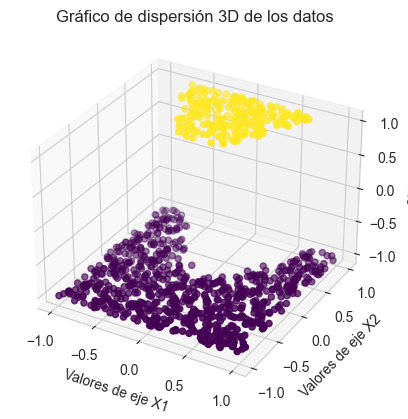

In [2]:
# Graficar los datos en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis')

ax.set_xlabel('Valores de eje X1')
ax.set_ylabel('Valores de eje X2')
ax.set_zlabel('Objetivo')
plt.title('Gráfico de dispersión 3D de los datos')
plt.show()

#### (a) ¿Los datos de entrenamiento se encuentran en un plano o en una curva?

- A partir del gráfico de dispersión 3D de los datos que has generado, se observa que los puntos están claramente separados en dos regiones bien definidas, una agrupada en la parte superior y otra en la parte inferior. Esto sugiere que los datos están distribuidos en un patrón no lineal, lo que indica que no están distribuidos completamente en un plano, sino más bien en una curva o estructura más compleja. Este comportamiento no lineal puede ser capturado mejor con características polinómicas o transformaciones no lineales.

#### Generación de características polinómicas

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Crear un generador de características polinómicas hasta el grado 5
poly = PolynomialFeatures(degree=5)

# Transformar las características originales en características polinómicas
X_poly = poly.fit_transform(X)

# Mostrar las nuevas dimensiones de X
print(f"Nuevas dimensiones de X: {X_poly.shape}")


Nuevas dimensiones de X: (999, 21)


#### (b) Parámetros de los modelos de regresión Lasso

In [5]:
from sklearn.linear_model import Lasso

# Rango de valores de C
C_range = [0.1, 1, 10, 100]  # Puedes ajustar este rango

# Iterar sobre los valores de C
for C in C_range:
    # Crear el modelo Lasso con alpha correspondiente
    alpha = 1 / (2 * C)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # Entrenar el modelo con las características polinómicas
    lasso.fit(X_poly, y)
    
    # Mostrar los coeficientes aprendidos
    print(f"Coeficientes para C = {C} (alpha = {alpha}):")
    for i, coef in enumerate(lasso.coef_):
        print(f"Característica {i}: {coef}")
    print("\n")





Coeficientes para C = 0.1 (alpha = 5.0):
Característica 0: 0.0
Característica 1: 0.0
Característica 2: 0.0
Característica 3: -0.0
Característica 4: 0.0
Característica 5: 0.0
Característica 6: 0.0
Característica 7: 0.0
Característica 8: 0.0
Característica 9: 0.0
Característica 10: -0.0
Característica 11: 0.0
Característica 12: -0.0
Característica 13: 0.0
Característica 14: 0.0
Característica 15: 0.0
Característica 16: 0.0
Característica 17: 0.0
Característica 18: 0.0
Característica 19: 0.0
Característica 20: 0.0


Coeficientes para C = 1 (alpha = 0.5):
Característica 0: 0.0
Característica 1: 0.0
Característica 2: 0.0
Característica 3: -0.0
Característica 4: 0.0
Característica 5: 0.0
Característica 6: 0.0
Característica 7: 0.0
Característica 8: 0.0
Característica 9: 0.0
Característica 10: -0.0
Característica 11: 0.0
Característica 12: -0.0
Característica 13: 0.0
Característica 14: 0.0
Característica 15: 0.0
Característica 16: 0.0
Característica 17: 0.0
Característica 18: 0.0
Característi


#### Explicación:
Definimos un rango de valores de C que va de 0.1 a 100. Puedes ajustar este rango según los resultados que observes.
Para cada valor de C, calculamos su correspondiente alpha como 𝛼=1/2𝐶Luego, entrenamos un modelo Lasso usando Lasso(alpha=alpha, max_iter=10000). max_iter asegura que el modelo converge incluso en casos complicados.
lasso.coef_ nos devuelve los coeficientes aprendidos para cada característica, y los mostramos en pantalla.
A medida que incrementas **𝐶**, la penalización disminuye y el modelo tiende a incluir más características. Esto puede llevar a una mejor capacidad predictiva si se maneja adecuadamente, pero si **𝐶** es demasiado grande, el modelo podría sobreajustarse (overfitting) a los datos de entrenamiento, capturando incluso el ruido.

En resumen:
- Para valores bajos de **𝐶**: Pocos parámetros no nulos (modelo más simple).
- Para valores altos de **𝐶**: Más parámetros no nulos, lo que puede llevar a sobreajuste si se excede.


#### (c) Generación de predicciones en una cuadrícula de valores
Para este paso, vamos a crear una cuadrícula de valores y generar predicciones en dicha cuadrícula usando los modelos Lasso que entrenamos anteriormente.

 * Generamos una cuadrícula de valores para las dos primeras características.
 * Utilizamos los modelos Lasso para predecir los valores objetivos en esta cuadrícula.

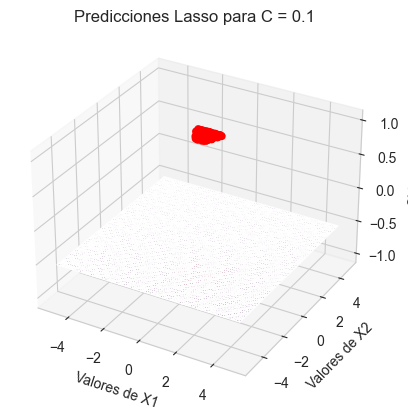

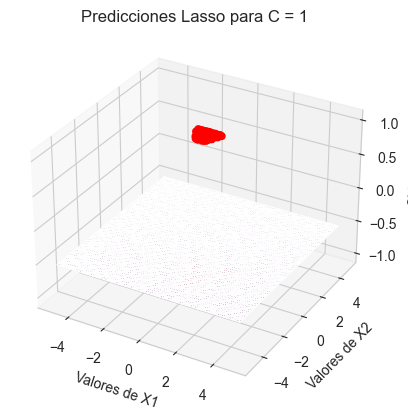

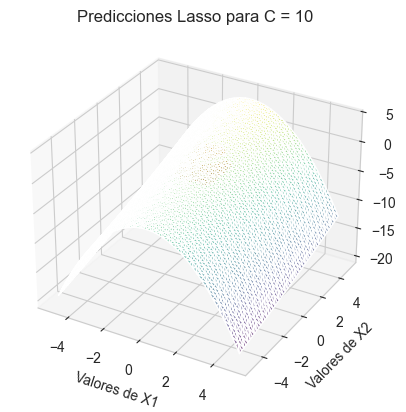

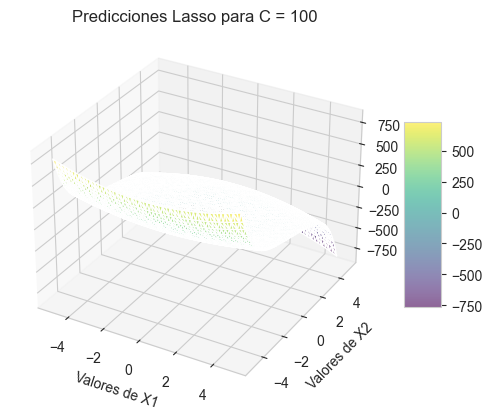

In [9]:
import numpy as np

# Crear una cuadrícula de valores entre -5 y 5 (ajusta el rango según sea necesario)
grid = np.linspace(-5, 5)
Xtest = []

# Crear las combinaciones de la cuadrícula para las dos características
for i in grid:
    for j in grid:
        Xtest.append([i, j])

Xtest = np.array(Xtest)

# Transformar las combinaciones en características polinómicas
Xtest_poly = poly.transform(Xtest)

# Generar predicciones para cada modelo Lasso
for C in C_range:
    alpha = 1 / (2 * C)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_poly, y)
    
    # Hacer predicciones para la cuadrícula
    y_pred = lasso.predict(Xtest_poly)
    
    # Gráfica de predicciones 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Datos de entrenamiento
    ax.scatter(X[:, 0], X[:, 1], y, c='red', label='Datos de entrenamiento')

    # Gráfico de superficie con colores
    surf = ax.plot_trisurf(Xtest[:, 0], Xtest[:, 1], y_pred, cmap='viridis', alpha=0.6)

    # Agregar leyenda y etiquetas
    ax.set_xlabel('Valores de X1')
    ax.set_ylabel('Valores de X2')
    ax.set_zlabel('Objetivo')
    ax.set_title(f'Predicciones Lasso para C = {C}')
# Agregar barra de color
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

#### Explicación:
* grid = np.linspace(-5, 5) crea una cuadrícula de valores entre -5 y 5 para cada una de las dos características.
* Creamos combinaciones de valores para las dos primeras características usando bucles anidados.
* Transformamos estas combinaciones en características polinómicas utilizando poly.transform.
* Para cada modelo Lasso entrenado, generamos predicciones en la cuadrícula de valores (lasso.predict(Xtest_poly)).
* Utilizamos plot_trisurf para graficar una superficie de predicciones, y scatter para mostrar los datos de entrenamiento en el mismo gráfico.
* Cómo las predicciones cambian según el valor de C. Para valores más pequeños de C, el modelo será más restringido, mientras que para valores más grandes, el ajuste será más flexible.



#### (d) Análisis del parámetro C en Lasso: subajuste vs sobreajuste

Este paso consiste en explicar cómo el parámetro de penalización C afecta el equilibrio entre subajuste y sobreajuste en la regresión Lasso. Para entender esto:

* Subajuste: ocurre cuando C es muy pequeño (es decir, alpha es grande). En este caso, la regularización es fuerte, lo que lleva a que muchos coeficientes sean exactamente cero. El modelo no se ajusta bien a los datos de entrenamiento, es decir, es demasiado simple.

* Sobreajuste: ocurre cuando C es grande (es decir, alpha es pequeño). En este caso, la regularización es débil o inexistente, lo que permite que el modelo se ajuste mucho a los datos de entrenamiento. Esto puede llevar a un ajuste excesivo, capturando el ruido en los datos y resultando en una mala generalización para nuevos datos.

A medida que varías C:

Para valores muy pequeños de C, el modelo Lasso reducirá muchos coeficientes a cero, eliminando algunas de las características (esto es útil cuando quieres evitar características irrelevantes). Sin embargo, si C es demasiado pequeño, el modelo no captará la estructura de los datos, lo que resulta en un subajuste.

Para valores más grandes de C, el modelo tendrá menos restricciones y será capaz de ajustar los datos con mayor precisión. Sin embargo, si C es demasiado grande, el modelo podría sobreajustar los datos, lo que resulta en sobreajuste.

En resumen, al ajustar C puedes controlar este equilibrio:

* C pequeño (regularización fuerte): subajuste.
* C grande (regularización débil): sobreajuste.

#### (e) Regresión Ridge y comparación con Lasso

In [10]:
from sklearn.linear_model import Ridge

# Iterar sobre los mismos valores de C
for C in C_range:
    # Crear el modelo Ridge con alpha correspondiente
    alpha = 1 / (2 * C)
    ridge = Ridge(alpha=alpha, max_iter=10000)
    
    # Entrenar el modelo con las características polinómicas
    ridge.fit(X_poly, y)
    
    # Mostrar los coeficientes aprendidos
    print(f"Coeficientes para Ridge con C = {C} (alpha = {alpha}):")
    for i, coef in enumerate(ridge.coef_):
        print(f"Característica {i}: {coef}")
    print("\n")


Coeficientes para Ridge con C = 0.1 (alpha = 5.0):
Característica 0: 0.0
Característica 1: -0.025951886157058308
Característica 2: 1.502345615769885
Característica 3: -1.211744515855783
Característica 4: 0.020803584276808926
Característica 5: 0.7003091898633718
Característica 6: 0.008526630087685007
Característica 7: -1.241360713105308
Característica 8: 0.05663233000828622
Característica 9: -0.13486349207893814
Característica 10: 0.2417514067653953
Característica 11: -0.0026526535469847956
Característica 12: -0.3841365030949572
Característica 13: -0.006848846348304795
Característica 14: -0.12330993091394264
Característica 15: 0.0009922735861356681
Característica 16: -0.5066024424503354
Característica 17: 0.029461903768252178
Característica 18: 0.0034662203030849533
Característica 19: -0.02101847614633088
Característica 20: -0.17313701313250732


Coeficientes para Ridge con C = 1 (alpha = 0.5):
Característica 0: 0.0
Característica 1: -0.06367664146125285
Característica 2: 2.215833658202

#### Comparación entre Lasso y Ridge:
* Lasso: Algunos coeficientes se reducen a cero, lo que hace que el modelo sea más esparso, es decir, selecciona solo las características más importantes.
* Ridge: Ningún coeficiente se reduce a cero, pero todos se reducen proporcionalmente. Ridge tiende a ser más útil cuando todas las características son relevantes, pero el objetivo es prevenir coeficientes muy grandes. Los coeficientes en Ridge no se reducen a cero, pero verás que cuanto más pequeño sea C (más grande alpha), más pequeños se vuelven los coeficientes.

#### (i) Validación cruzada con Lasso y Ridge
##### **Lasso**

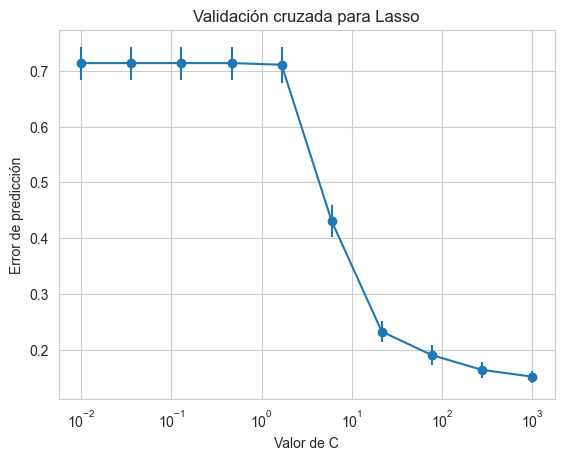

In [11]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Rango de valores de C para validación cruzada
C_range = np.logspace(-2, 3, 10)  # Ejemplo: desde 0.01 hasta 1000

# Almacenar los resultados
mean_errors = []
std_errors = []

# Validación cruzada para Lasso
for C in C_range:
    alpha = 1 / (2 * C)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # Realizar validación cruzada (K=5)
    scores = cross_val_score(lasso, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    
    # Almacenar el error promedio y desviación estándar
    mean_errors.append(-np.mean(scores))
    std_errors.append(np.std(scores))

# Graficar los resultados
plt.errorbar(C_range, mean_errors, yerr=std_errors, fmt='-o')
plt.xscale('log')  # Escala logarítmica en el eje x
plt.xlabel('Valor de C')
plt.ylabel('Error de predicción')
plt.title('Validación cruzada para Lasso')
plt.show()


#### Explicacion

* np.logspace(-2, 3, 10) genera un rango de valores de C en escala logarítmica entre 0.1 y 1000.
* Usamos cross_val_score para realizar validación cruzada con 5 particiones, evaluando el modelo en términos del error cuadrático medio negativo.
* Graficamos el error promedio y su desviación estándar usando plt.errorbar, permite visualizar cómo cambia el error de predicción a medida que varía C.

Con base en esta gráfica, recomendaría un valor de cercano a 10. Este valor ofrece un una buena relacion entre error de predicción bajo y evitar el sobreajuste. Además, el rango de error no varía tanto en los valores mayores, lo que sugiere que el modelo es bastante estable en ese rango.

#### (i) Validación cruzada con Lasso y Ridge
##### **Ridge**

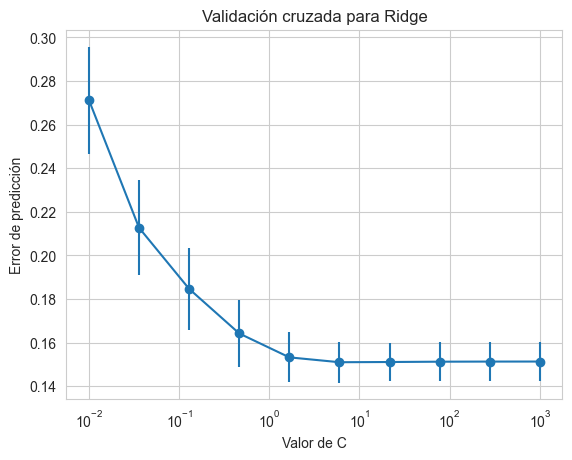

In [12]:
mean_errors_ridge = []
std_errors_ridge = []

# Validación cruzada para Ridge
for C in C_range:
    alpha = 1 / (2 * C)
    ridge = Ridge(alpha=alpha, max_iter=10000)
    
    # Realizar validación cruzada (K=5)
    scores = cross_val_score(ridge, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    
    # Almacenar el error promedio y desviación estándar
    mean_errors_ridge.append(-np.mean(scores))
    std_errors_ridge.append(np.std(scores))

# Graficar los resultados
plt.errorbar(C_range, mean_errors_ridge, yerr=std_errors_ridge, fmt='-o')
plt.xscale('log')
plt.xlabel('Valor de C')
plt.ylabel('Error de predicción')
plt.title('Validación cruzada para Ridge')
plt.show()


#### (ii) Elección del mejor valor de C
En el gráfico de validación cruzada, se muestra el valor de C que minimiza el error promedio de predicción.

En mi analisis me mantendria en 10^0 porque es donde se encuentra el punto de inflexion antes del sobre ajuste basandome en lo siguiente:
C aumenta (en el rango de 10^-1 Y 10^1), el error de predicción disminuye rápidamente, indicando que el modelo se ajusta mejor a los datos. A partir de C≥10, el error de predicción se estabiliza y ya no disminuye significativamente.